In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
dec_hidden_state = [5,1,20]

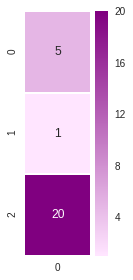

In [3]:
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(dec_hidden_state)), annot=True, cmap=sns.light_palette("purple", as_cmap=True), linewidths=1)

In [0]:
annotation = [3,12,45] #e.g. Encoder hidden state

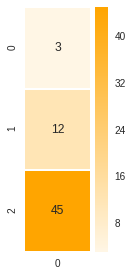

In [5]:
# Let's visualize the single annotation
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(annotation)), annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [0]:
def single_dot_attention_score(dec_hidden_state,enc_hidden_state):
  return np.dot(dec_hidden_state, enc_hidden_state)

In [7]:
single_dot_attention_score(dec_hidden_state, annotation)

927

In [0]:
annotations_new = np.transpose([[3,12,45], [59,2,5], [1,43,5], [4,3,45.3]])

In [9]:
annotations_new

array([[ 3. , 59. ,  1. ,  4. ],
       [12. ,  2. , 43. ,  3. ],
       [45. ,  5. ,  5. , 45.3]])

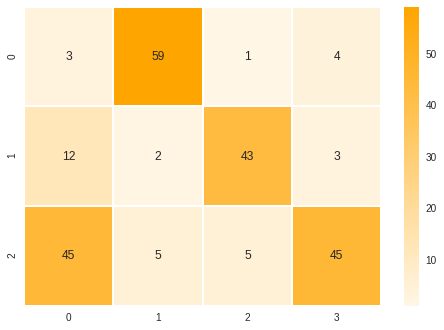

In [10]:
ax = sns.heatmap(annotations_new, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [0]:
def dot_attention_score(dec_hidden_state, annotations):
    # TODO: return the product of dec_hidden_state transpose and enc_hidden_states
    return np.matmul(np.transpose(dec_hidden_state), annotations)

In [0]:
attention_weights_raw = dot_attention_score(dec_hidden_state, annotations_new)

In [15]:
attention_weights_raw

array([927., 397., 148., 929.])

In [19]:
np.array(attention_weights_raw,dtype=np.float128)
np.exp(attention_weights_raw,dtype=np.float128)

array([3.89928271e+402, 2.59961668e+172, 1.88618081e+064, 2.88120187e+403],
      dtype=float128)

In [20]:
def softmax(x):
    x = np.array(x, dtype=np.float128)
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0) 

attention_weights = softmax(attention_weights_raw)
attention_weights

array([1.19202922e-001, 7.94715151e-232, 5.76614420e-340, 8.80797078e-001],
      dtype=float128)

In [21]:
def apply_attention_scores(attention_weights, annotations):
    # TODO: Multiple the annotations by their weights
    return attention_weights * annotations

applied_attention = apply_attention_scores(attention_weights, annotations_new)
applied_attention

array([[3.57608766e-001, 4.68881939e-230, 5.76614420e-340,
        3.52318831e+000],
       [1.43043506e+000, 1.58943030e-231, 2.47944200e-338,
        2.64239123e+000],
       [5.36413149e+000, 3.97357575e-231, 2.88307210e-339,
        3.99001076e+001]], dtype=float128)

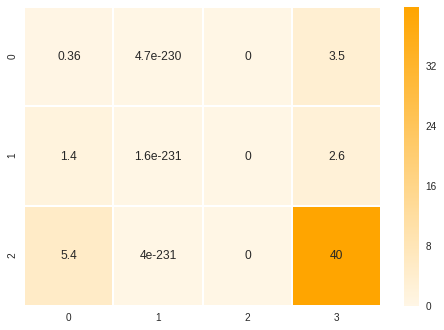

In [22]:
ax = sns.heatmap(applied_attention, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [23]:
def calculate_attention_vector(applied_attention):
    return np.sum(applied_attention, axis=1)

attention_vector = calculate_attention_vector(applied_attention)
attention_vector

array([ 3.88079708,  4.0728263 , 45.26423912], dtype=float128)

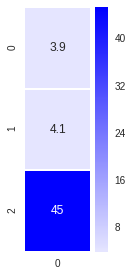

In [24]:
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Blue", as_cmap=True), linewidths=1)